# Food Delivery Cost and Profitability Analysis
Dataset is taken from https://statso.io/optimizing-cost-and-profitability-case-study/

A food delivery service is facing challenges in achieving profitability across its operations. With a dataset of 1,000 food orders, the service seeks to understand the dynamics of its cost structure and profitability to identify strategic opportunities for improvement.

Your task is to conduct:

- Detailed Cost Analysis: Identifying the major cost components associated with delivering food orders, including direct costs like delivery fees and indirect costs like discounts and payment processing fees.


- Profitability Evaluation: Calculating the profitability of individual orders and aggregating this data to assess overall profitability. This involves examining how revenue generated from commission fees measures against the total costs.


- Strategic Recommendations for Improvement: Based on the cost and profitability analysis, identifying actionable strategies to reduce costs, adjust pricing, commission fees, and discount strategies to improve profitability. This includes finding a “sweet spot” for commission and discount percentages that ensures profitability across orders.


- Impact Simulation of Proposed Strategies: Simulating the financial impact of the recommended strategies on profitability, using the dataset to forecast how adjustments in commission rates and discount strategies could potentially transform current losses into profits

In [161]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [162]:
#Upload dataset
df=pd.read_csv('food_orders_new_delhi.csv')
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


The dataset contains 1,000 entries and 12 columns, all of which are complete with no missing values. Our focus now shifts to data refinement. Key tasks include converting "Order Date and Time" and "Delivery Date and Time" to a datetime format, ensuring consistency in the representation of "Discounts and Offers", and confirming that all monetary values are formatted appropriately for precise calculations.


In [164]:
#Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.
df['Order Date and Time']=pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time']=pd.to_datetime(df['Delivery Date and Time'])

In [165]:
#Exploring “Discounts and Offers” 
df['Discounts and Offers'].unique()

array(['5% on App', '10%', '15% New User', 'None', '50 off Promo'],
      dtype=object)

In [166]:
#Extracting numeric values out of Discount and Offers column
def extract_deal(text):
    # Define the delimiters to check for
    delimiters = ['%', 'off']
    
    # Loop through each delimiter and check if it's in the text
    for delimiter in delimiters:
        if delimiter in text:
            # Find the index of the delimiter
            index = text.find(delimiter)
            # Extract the substring before the delimiter and remove spaces
            return float(text[:index].replace(' ', ''))
    
    # Return an empty string if no delimiters are found
    return None

#Applying function
df['Discount Percentage']=df['Discounts and Offers'].apply(extract_deal)

## Cost and Profitability Analysis
#### Adding necessary columns for analysis
In conducting a comprehensive Cost and Profit analysis, our primary focus lies in computing both cost and profit. This can be achieved by understanding that the platform's revenue predominantly originates from the Commission Fee. Cost encompasses the summation of various expenses, including delivery fees, payment processing fees, and discounts provided. Net profit, on the other hand, is derived by subtracting the total costs from the revenue.

In [169]:
# Calculate the discount amount based on the order value (If None, amount is 0)
df['Discount Amount'] = df.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if pd.notnull(x['Discount Percentage'])
                                                   else 0, axis=1)

In [172]:
# Calculate total costs 
df['Total Cost']=df['Delivery Fee']+df['Payment Processing Fee']+df['Discount Amount']
# Calculate Revenue
df['Revenue']=df['Commission Fee']
# Calculate Profit
df['Profit']=df['Revenue']-df['Total Cost']

In [173]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Cost,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,NaN,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00


In [174]:
# See metrics
total_cost=df['Total Cost'].sum()
revenue=df['Revenue'].sum()
profit=df['Profit'].sum()
num_orders=df.shape[0]

overall_metrics = {
    "Total Orders": num_orders,
    "Total Cost": total_cost,
    "Total Revenue": revenue,
    "Total Profit": profit}

overall_metrics

{'Total Orders': 1000,
 'Total Cost': 232709.85,
 'Total Revenue': 126990,
 'Total Profit': -105719.85}

The analysis shows that the expenses for food delivery outweigh the earnings from commission fees, resulting in a loss. This suggests that the current commission rates, delivery fees, and discount strategies are not profitable.

Let's visualize results.

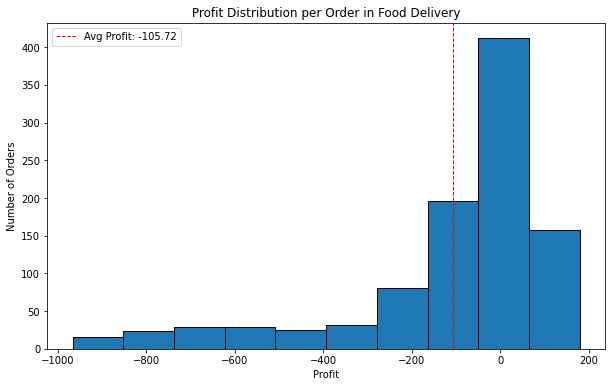

In [188]:
# Profits per order
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(df['Profit'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Avg Profit: {df["Profit"].mean():.2f}')
plt.legend()

plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss. The red dashed line indicates the average profit, which is in the negative part, highlighting the overall loss incurred

Now, let’s have a look at the proportion of total costs:

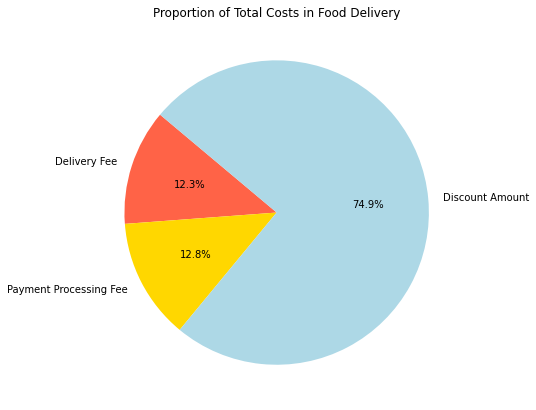

In [176]:
# The proportion of total costs
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

The pie chart provides a visual breakdown of total costs, categorizing them into delivery fees, payment processing fees, and discount amounts. Notably, discounts represent a substantial share of the costs, indicating that promotional strategies may significantly impact overall profitability.

Next, let's compare total revenue, total costs, and total profit (or net loss) to gain further insights.

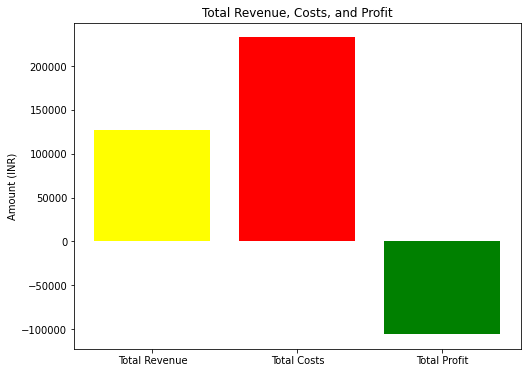

In [177]:
# Comparing of overall metrics
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [revenue, total_cost, profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['yellow', 'red', 'green'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

From our analysis, it's evident that discounts on food orders are leading to significant losses. To enhance profitability, we need to devise a new strategy. This entails finding an optimal balance between offering discounts and charging commissions. To achieve this, we'll delve deeper into the characteristics of profitable orders. 

In [178]:
# Find profitable orders
profitable=df[df.Profit>0]
profitable.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Cost,Revenue,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,NaN,0.00,77.00,146,69.00
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85


After delving into the dataset of profitable orders, our next step is to examine the mean commission and discount percentages. These metrics will provide crucial insights into the profitability of our operations and guide us in optimizing our strategies for greater financial success.

In [180]:
# Commission percentage
profitable['Commission Percentage']=profitable['Commission Fee']/profitable['Order Value']*100

#Avg commission
avg_commission=profitable['Commission Percentage'].mean()

#Average discount
avg_discount=profitable['Discount Percentage'].fillna(0).mean()

avg_commission,avg_discount

(30.508436145149435, 5.867469879518072)

Based on the analysis of profitable orders, we find a new set of averages that could represent an optimal combination for commission and discount percentages:
- New Average Commission Percentage: 30.51%
- New Average Discount Percentage: 5.87%

While the previous strategy included Average Commission Percentage of 19.75% and Average Discount Percentage of 16.26%

In [181]:
# Commission percentage
df['Commission Percentage']=df['Commission Fee']/df['Order Value']*100
#Avg commission
ALLavg_commission=df['Commission Percentage'].mean()
#Average discount
ALLavg_discount=df['Discount Percentage'].fillna(0).mean()

ALLavg_commission,ALLavg_discount

(19.750890168545332, 16.265)

The analysis reveals that the average commission percentage for profitable orders surpasses the overall average across all orders, implying that a higher commission rate may play a crucial role in achieving profitability. Conversely, the average discount percentage for profitable orders is notably lower than the overall average, suggesting that reducing discounts could enhance profitability without significantly impacting order volume.

Considering these findings, a strategy focusing on a commission rate around 30% and a discount rate approximately 6% could potentially bolster profitability across the entire spectrum of orders.


Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders. 

#### Simulate profitability per order using the recommended discounts (6%) and commissions (30%) to see the potential impact on profitability.

In [182]:
#Changing Commission and Discount amount
df['Simulated Commission Fee'] = df['Order Value'] * (30 / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (6 / 100)

#Recalculating total costs and profit with simulated values
df['Simulated Total Costs'] = (df['Delivery Fee'] +
                                        df['Payment Processing Fee'] +
                                        df['Simulated Discount Amount'])

df['Simulated Profit'] = (df['Simulated Commission Fee'] -
                                   df['Simulated Total Costs'])



### Comparing Results

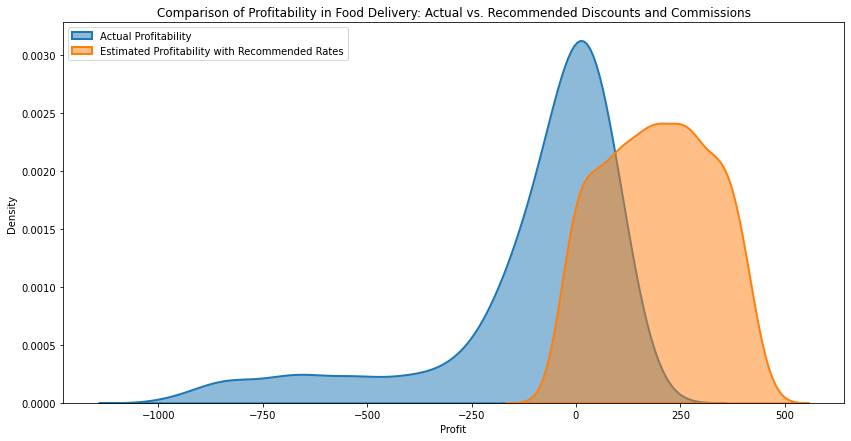

In [186]:
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The visualization contrasts the profitability distribution per order between actual discounts and commissions and a simulated scenario featuring recommended discounts (6%) and commissions (30%).

In the actual profitability distribution, we observe a varied mix, with a notable portion of orders yielding losses (profit < 0) and a wide range of profit levels across orders. Conversely, the simulated scenario suggests a shift towards enhanced profitability per order. Here, the distribution skews more towards positive profit, indicating that the recommended adjustments could potentially increase the proportion of profitable orders.